# Problem statement
XYZ is a service-providing company that provides customers with a one-year subscription plan for their product. 
The company wants to know if the customers will renew the subscription for the coming year or not.




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from  sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.pipeline import make_pipeline

In [4]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, ExtraTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [5]:
from sklearn.preprocessing import LabelEncoder

## read the csv data

In [6]:
df = pd.read_csv("data_regression.csv")

In [7]:
df.shape

(2000, 16)

## Checking what all data has null values

In [8]:
df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

##  Removing the unlabelled data

In [9]:
df_labeled = df[(df['churn'] == 1) | (df['churn'] == 0)]

In [10]:
df_labeled.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     26
customer_support_calls     0
churn                      0
dtype: int64

## missing gender values are filled with mode value

In [11]:
df_labeled['gender'] = df_labeled['gender'].fillna(df_labeled['gender'].mode()[0])

##  missing data for max days inactive are filled with median value

In [12]:
df_labeled['maximum_days_inactive'] = df_labeled['maximum_days_inactive'].fillna(df_labeled['maximum_days_inactive']).median()
                                                                                 

In [13]:
df_labeled.isnull().sum()

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

## removing the non required features. they will not have impact decision making

In [14]:
df_labeled = df_labeled.drop(['customer_id'], axis=1)
df_labeled = df_labeled.drop(['phone_no'], axis=1)
df_labeled = df_labeled.drop(['year'], axis=1)

In [15]:
df_labeled.head()
le = LabelEncoder()

## Label encoding for the categorial values to make it numeric

In [16]:
df_labeled['gender'] = le.fit_transform(df_labeled.gender)
df_labeled['multi_screen'] = le.fit_transform(df_labeled.multi_screen)
df_labeled['mail_subscribed'] = le.fit_transform(df_labeled.mail_subscribed)

In [17]:
# Finding the unique values in the columns

for i in df_labeled.columns:
    print("************************************",i,"**********************")
    print()
    print(set(df_labeled[i].tolist()))
    print()


************************************ gender **********************

{0, 1}

************************************ age **********************

{18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 82}

************************************ no_of_days_subscribed **********************

{1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,

In [18]:
df_labeled['churn'].value_counts()

0.0    1703
1.0     262
Name: churn, dtype: int64

AxesSubplot(0.125,0.11;0.775x0.77)


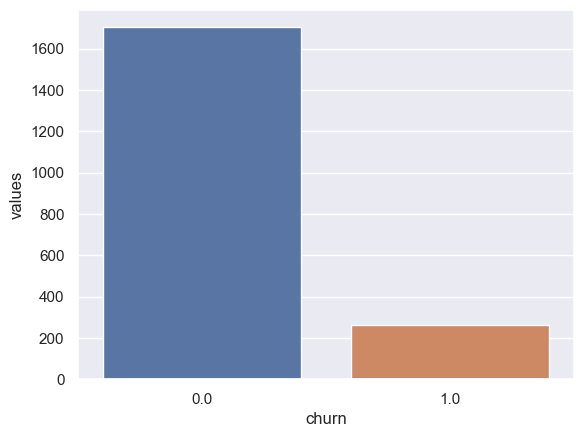

In [19]:
temp = df_labeled['churn'].value_counts()
temp_df = pd.DataFrame({'churn': temp.index, 'values': temp.values})
print(sns.barplot(x = 'churn', y='values', data=temp_df))

In [20]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  1965 non-null   int32  
 1   age                     1965 non-null   int64  
 2   no_of_days_subscribed   1965 non-null   int64  
 3   multi_screen            1965 non-null   int32  
 4   mail_subscribed         1965 non-null   int32  
 5   weekly_mins_watched     1965 non-null   float64
 6   minimum_daily_mins      1965 non-null   float64
 7   maximum_daily_mins      1965 non-null   float64
 8   weekly_max_night_mins   1965 non-null   int64  
 9   videos_watched          1965 non-null   int64  
 10  maximum_days_inactive   1965 non-null   float64
 11  customer_support_calls  1965 non-null   int64  
 12  churn                   1965 non-null   float64
dtypes: float64(5), int32(3), int64(5)
memory usage: 191.9 KB


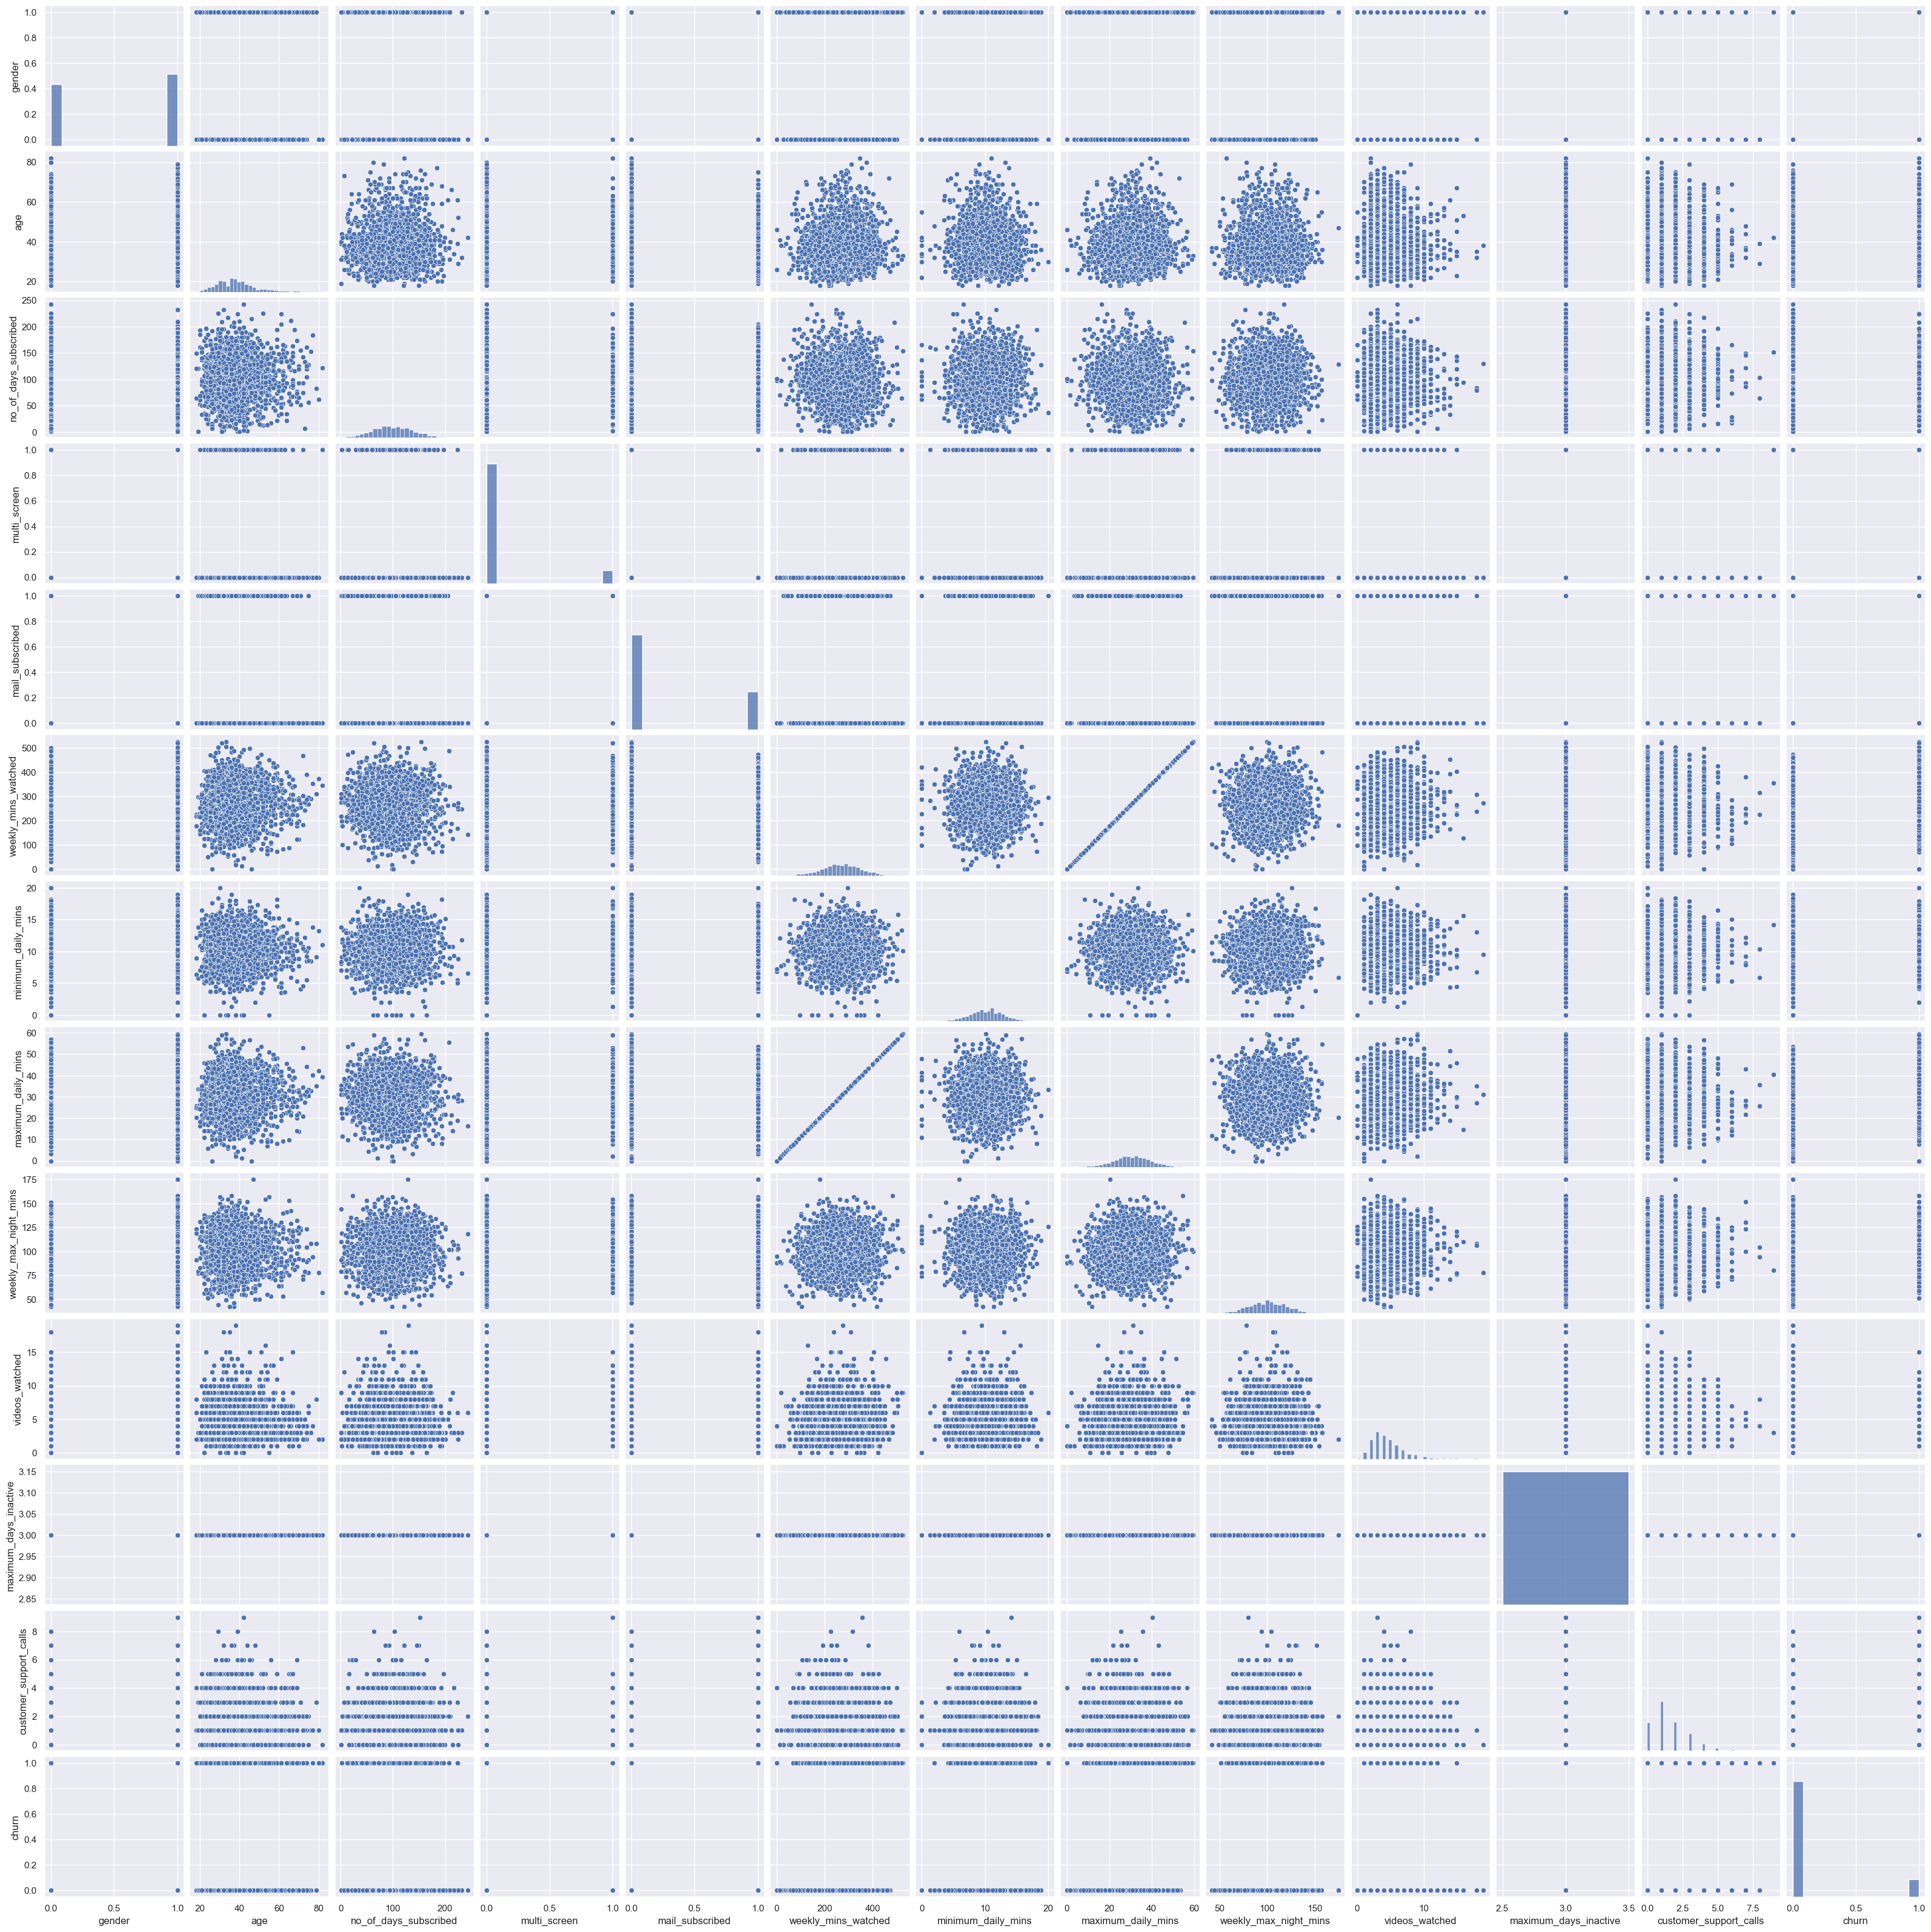

In [21]:
sns.pairplot(df_labeled)

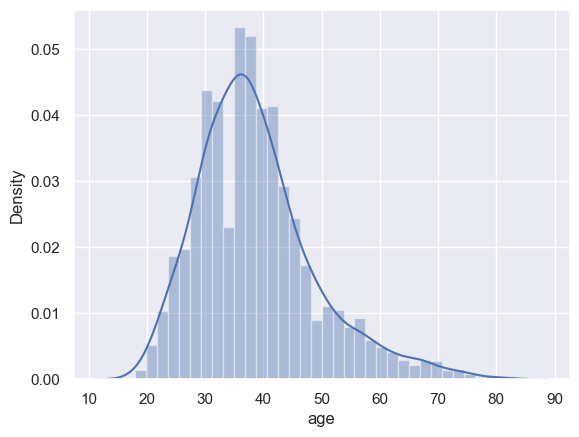

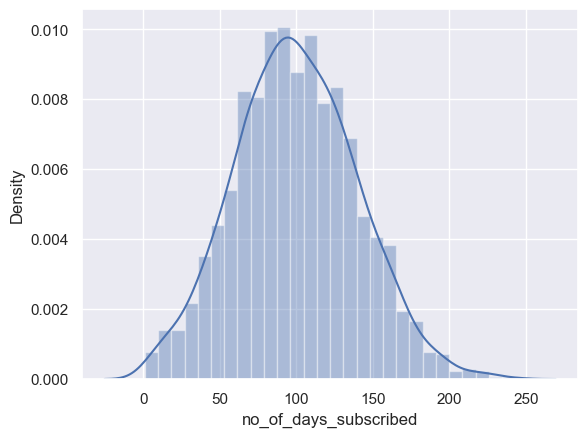

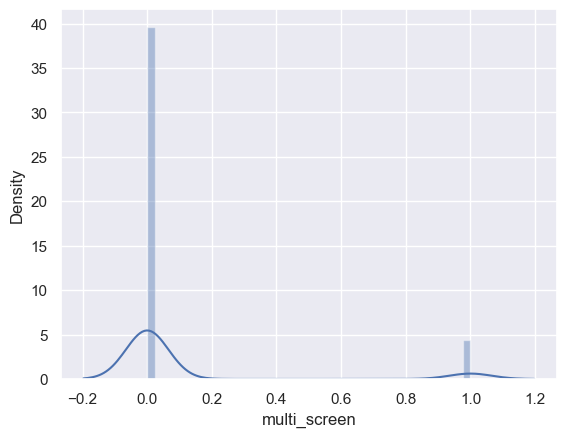

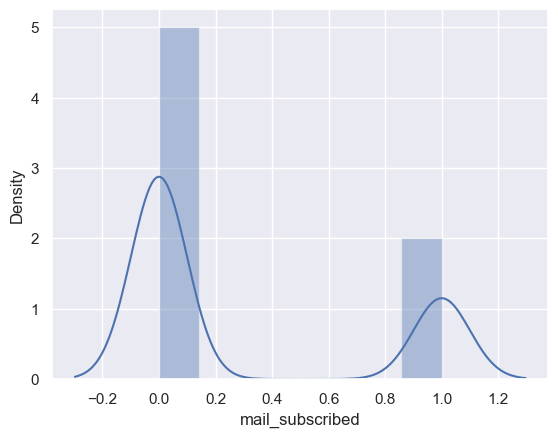

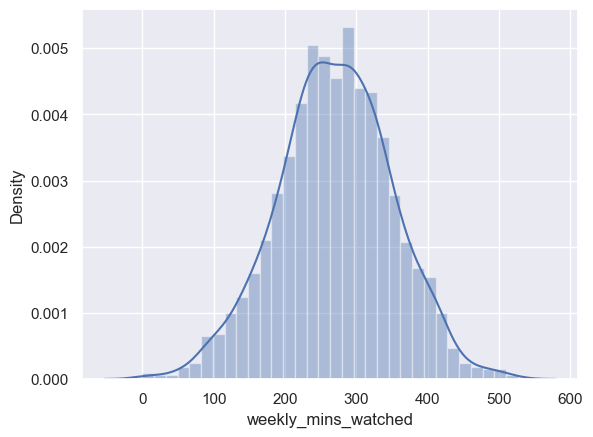

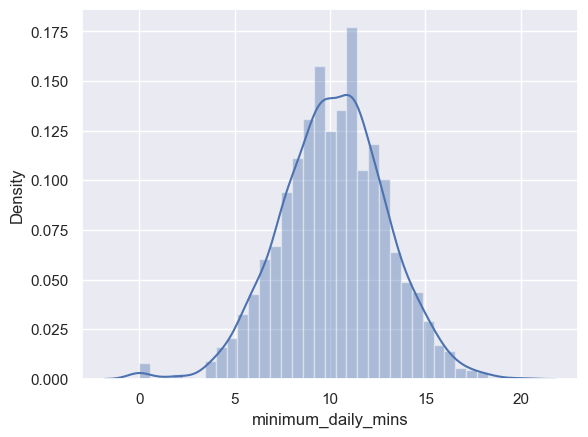

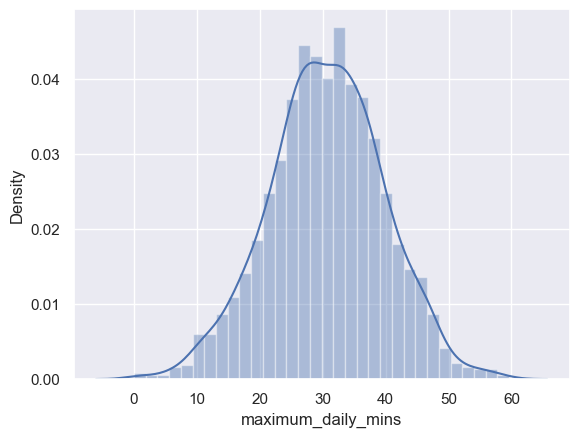

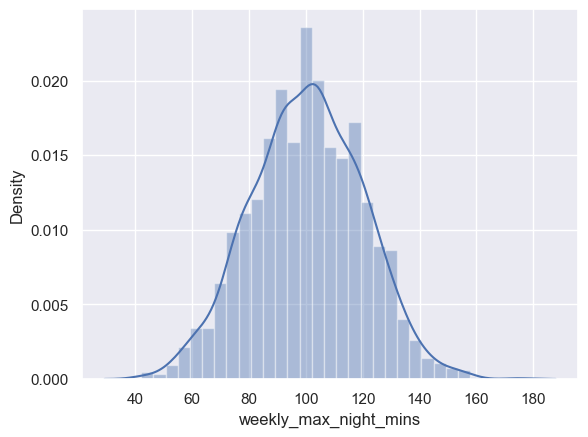

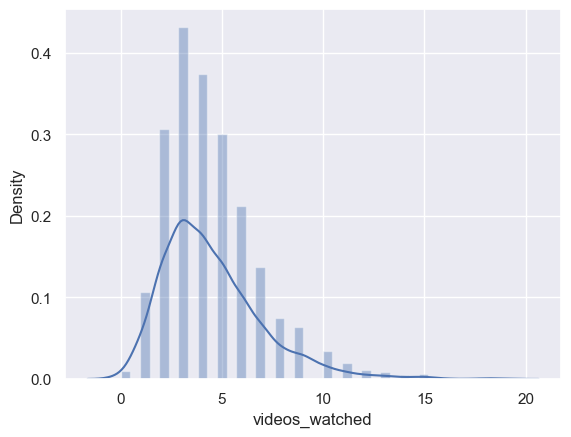

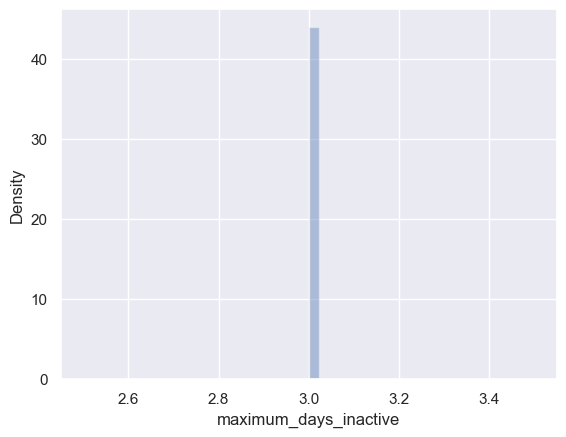

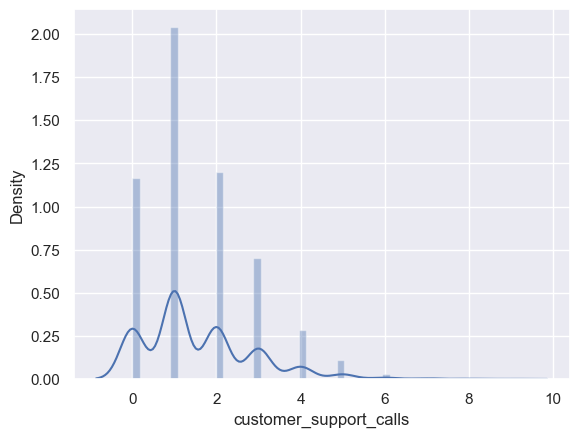

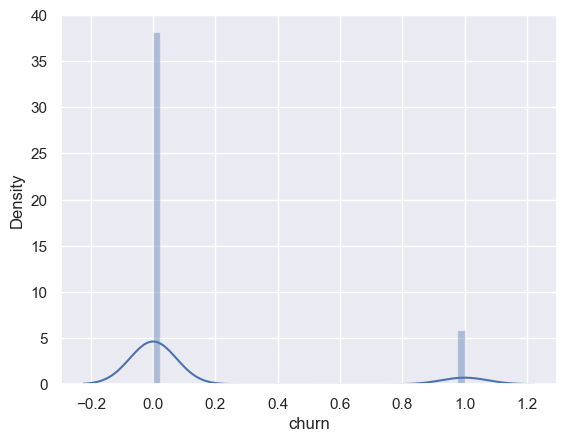

In [22]:
def distplots(col):
    sns.distplot(df_labeled[col])
    plt.show()
    
for i in list(df_labeled.select_dtypes(exclude=['object']).columns)[1:]:
    distplots(i)

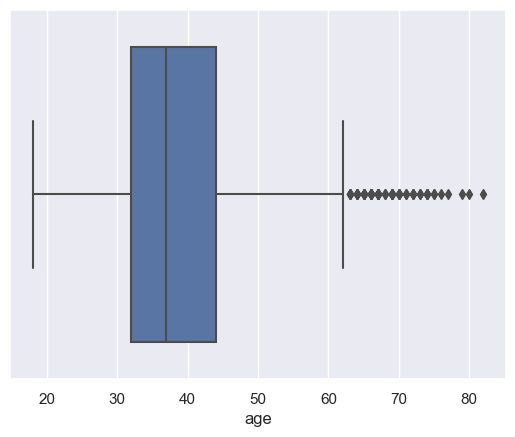

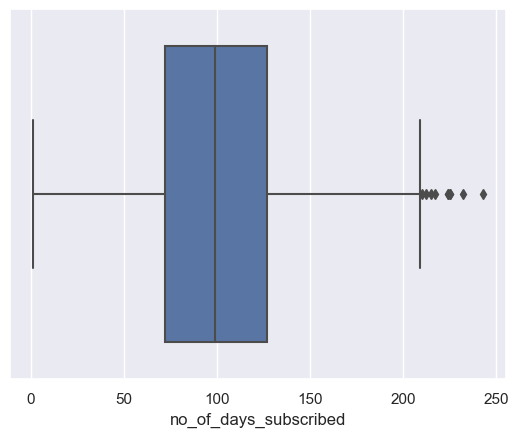

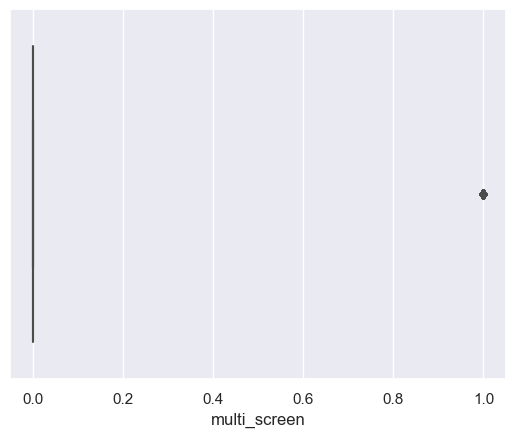

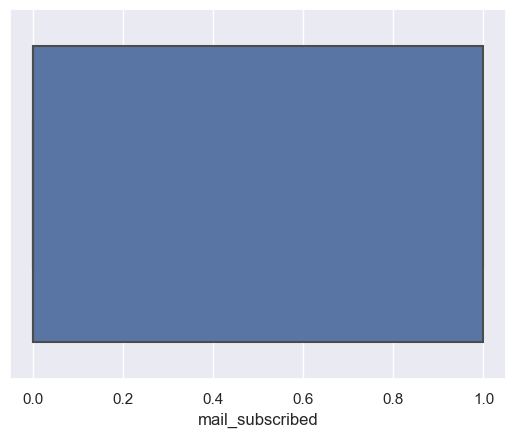

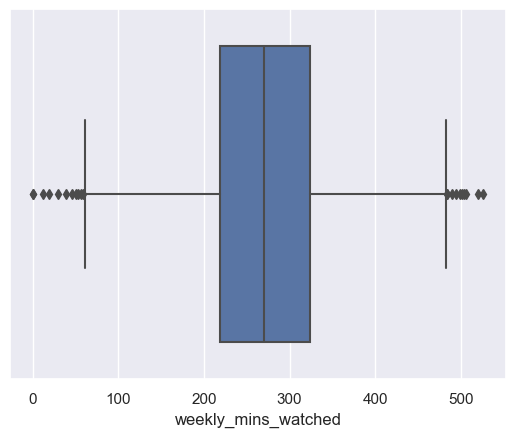

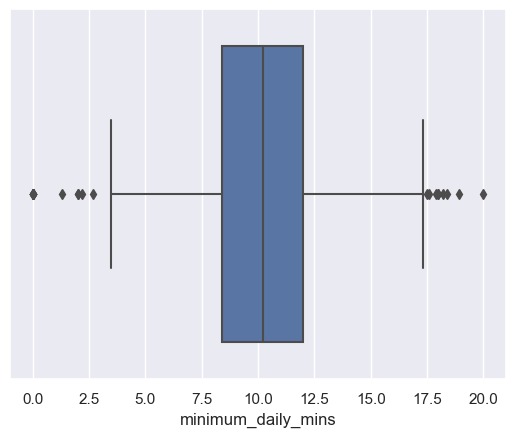

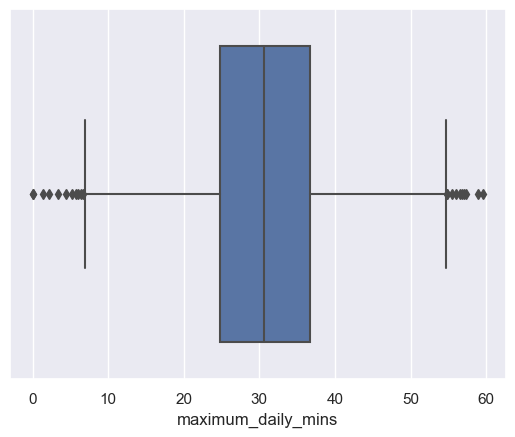

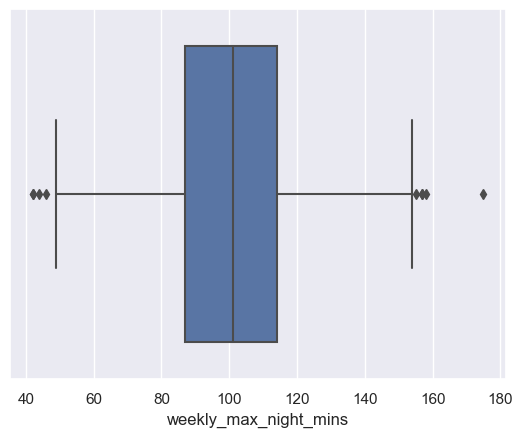

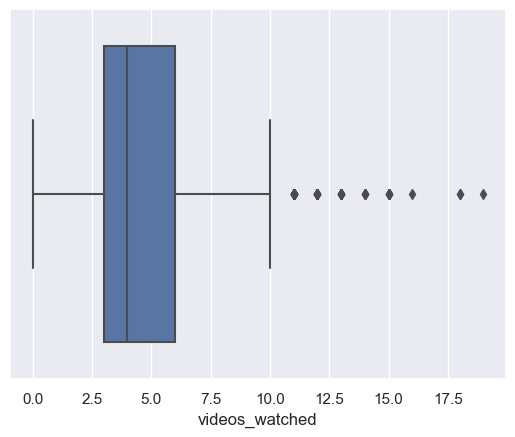

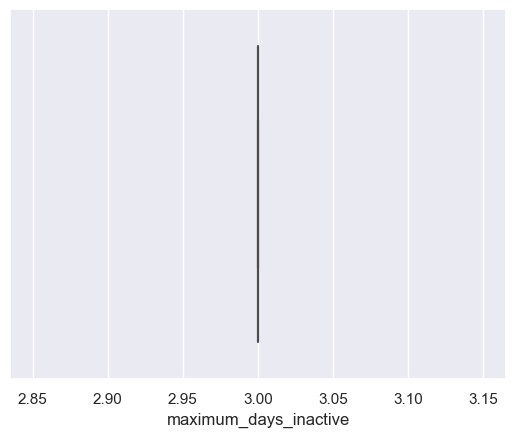

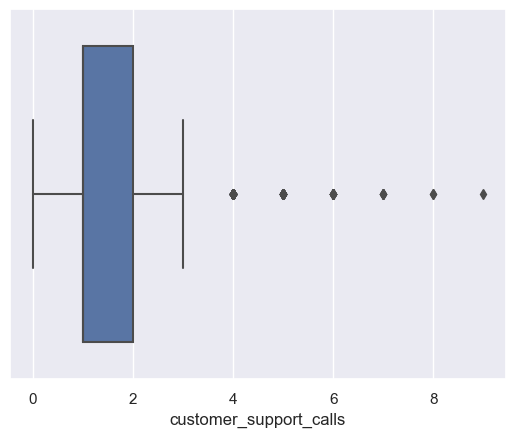

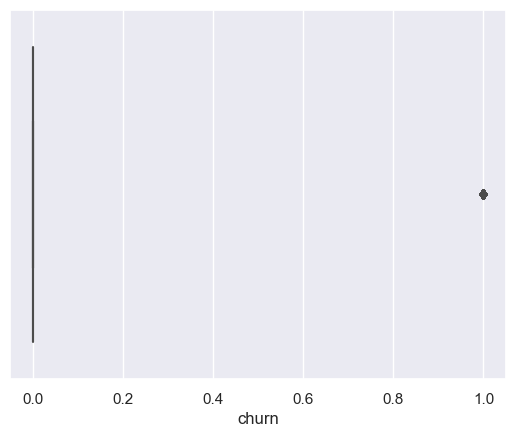

In [23]:
# Find and remove outliers of data

def boxplots(col):
    sns.boxplot(df_labeled[col])
    plt.show()
    
for i in list(df_labeled.select_dtypes(exclude=['object']).columns)[1:]:
    boxplots(i)

<AxesSubplot:>

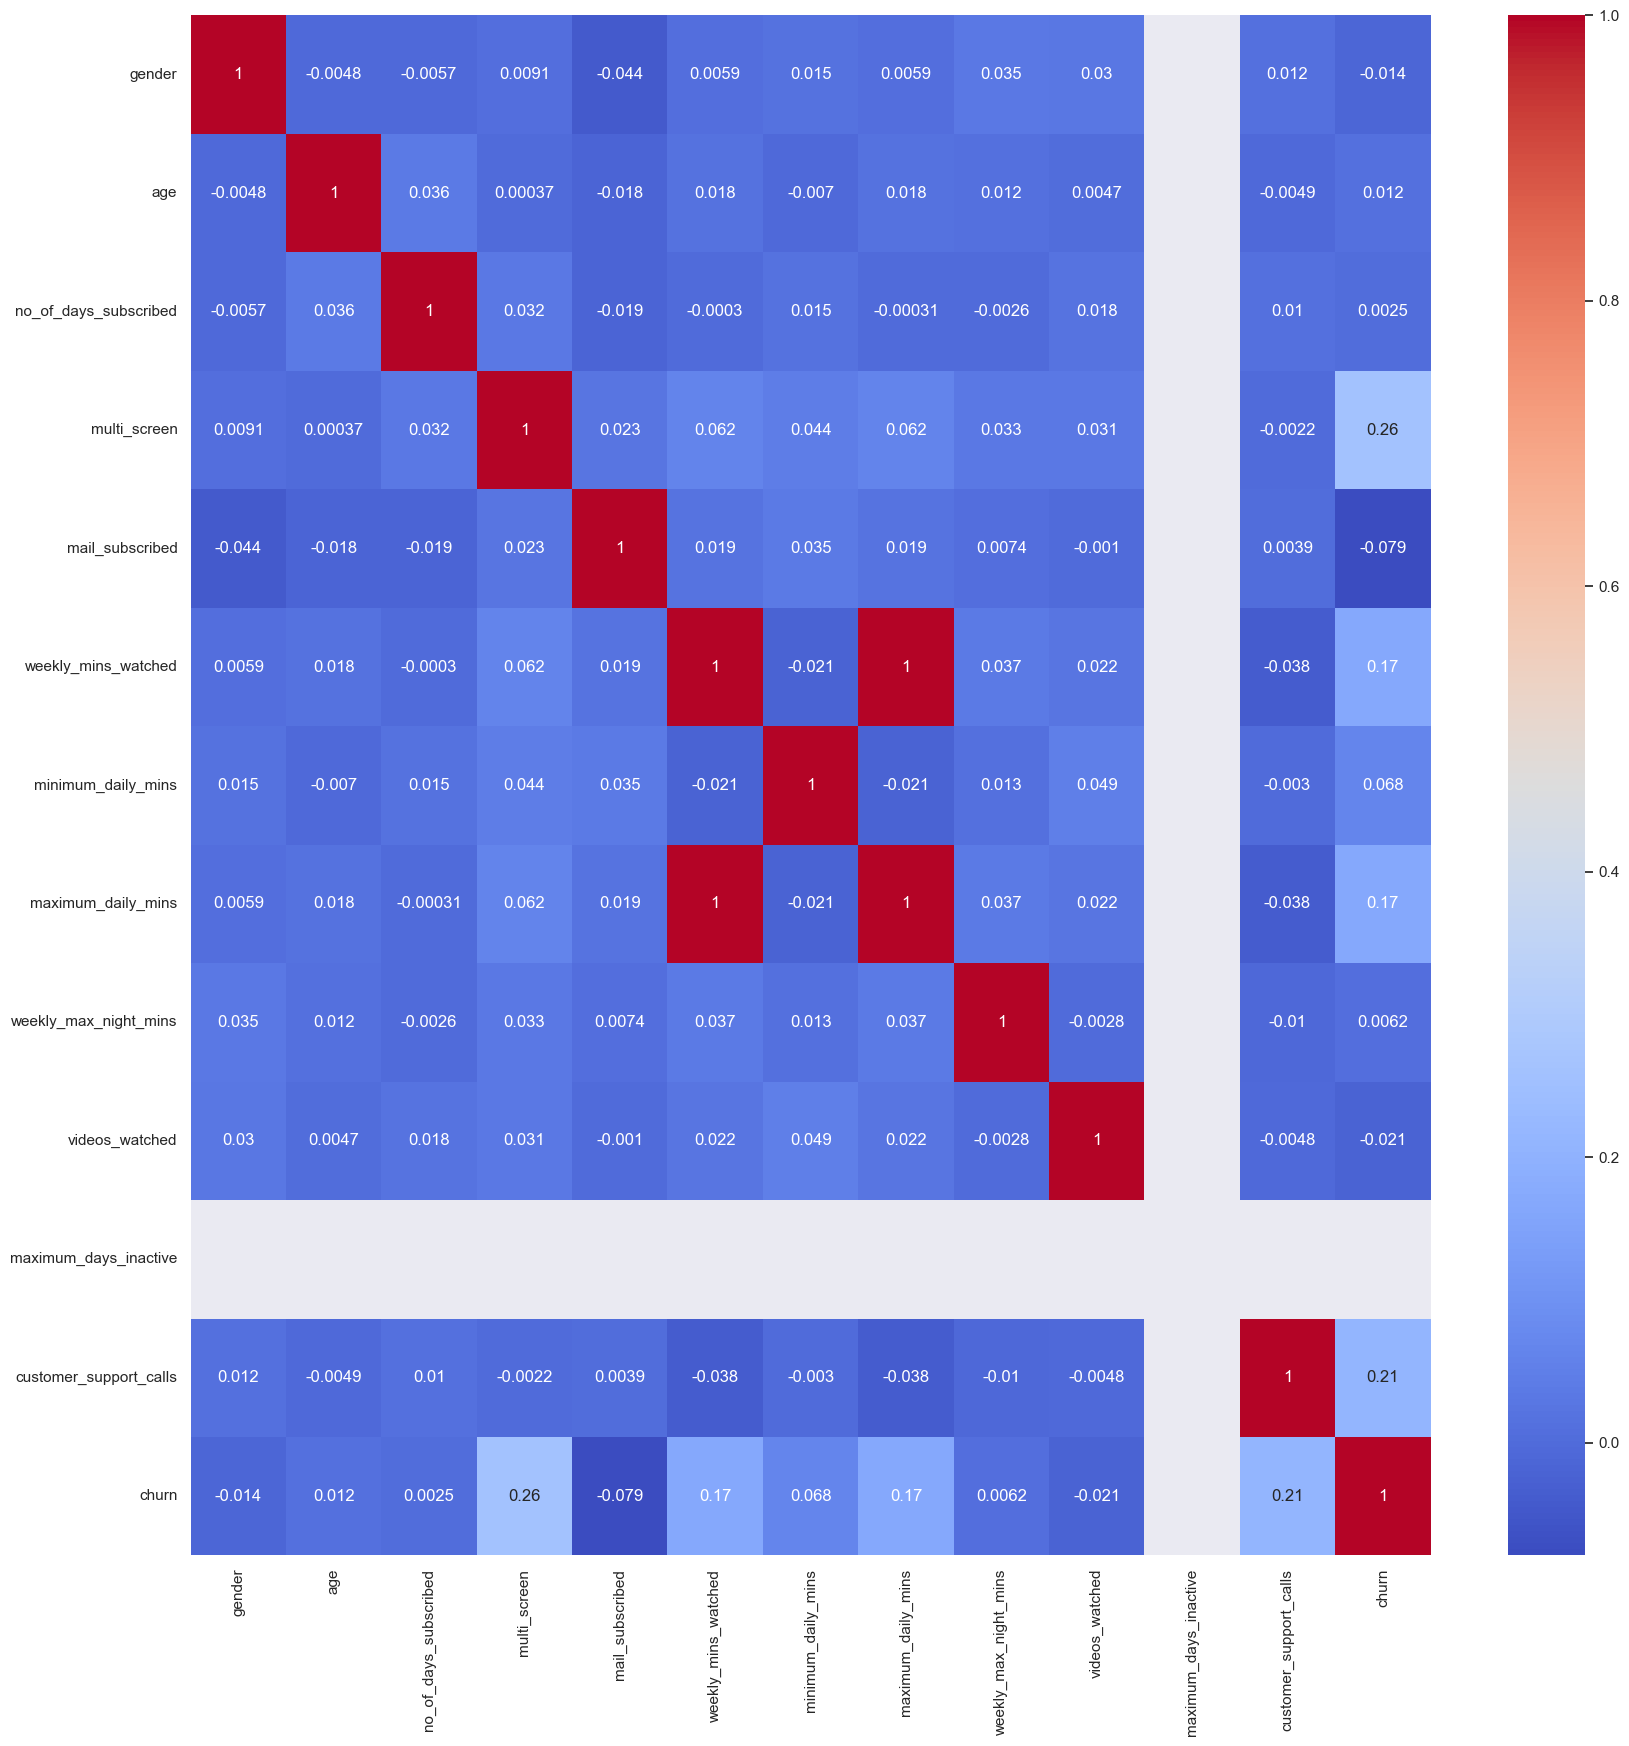

In [24]:
# Finding the correlation 

plt.figure(figsize=(20,20))
corr = df_labeled.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [25]:
import imblearn
from imblearn.over_sampling import RandomOverSampler


In [26]:
from collections import Counter

In [27]:
# split the data into independent variable and dependent variable
x = df_labeled.drop(['churn'], axis=1)
y = df_labeled['churn']

In [28]:
ros = RandomOverSampler()
x_ros , y_ros = ros.fit_resample(x, y)
print(Counter(y_ros))

Counter({0.0: 1703, 1.0: 1703})


In [29]:
#pip install imblearn

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
# feature scaling 
# Min Max Scaler (-1,1)
# from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(x_ros)
y = y_ros

In [32]:
# Applying PCA method to reduce non-significant variables and values (if any)

from sklearn.decomposition import PCA

# it means the machine(sklearn) choose the minimum number of PCA such that 95% of the variance is retained

pca = PCA(0.95)
x_pca = pca.fit_transform(x)
print(x.shape)
print(x_pca.shape)

(3406, 12)
(3406, 8)


In [33]:
pipelines = []
for model in [LogisticRegression(),
              DecisionTreeClassifier(),
              RandomForestClassifier(), 
              SVC(),
              KNeighborsClassifier(),
              RadiusNeighborsClassifier()]:
    pipeline = make_pipeline(model)
    pipelines.append(pipeline)

In [34]:
X = x_pca
Y = y

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.20)

In [36]:
param_grid = {}
log_grid = {'solver':['liblinear'], 
            'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'C':  [1.0, 2.0],
            'random_state': [1, 2, 40],
            
           }

dt_grid = {'criterion': ['gini', 'entropy'],
           'splitter': ['best', 'random'], 
           'max_depth': [5, 10, 15]
           }
rf_grid = {'n_estimators': [100, 200, 300],
           'criterion': ['gini', 'entropy']
           }

svc_grid = {'C': [1.0, 3.0, 5.0],
           'kernel': ['linear', 'poly', 'rbf'],
           'degree': [2, 3, 5]
           }

knn_grid = {'n_neighbors': [50, 100, 150],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'metric': ['minkowski'], 
            'p': [1, 2]
           }
rnn_grid = {'radius': [300, 400, 500],
            'weights':['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'metric': ['minkowski'], 
            'p': [1, 2]
           }
lst = [log_grid,dt_grid, rf_grid,svc_grid, knn_grid, rnn_grid]
i=0

for pipeline in pipelines:   
    if(i < len(lst)):
        param_grid[pipeline[0]] = lst[i]
        i = i+1 


In [37]:
param_grid

{LogisticRegression(): {'solver': ['liblinear'],
  'penalty': ['l1', 'l2', 'elasticnet', 'none'],
  'C': [1.0, 2.0],
  'random_state': [1, 2, 40]},
 DecisionTreeClassifier(): {'criterion': ['gini', 'entropy'],
  'splitter': ['best', 'random'],
  'max_depth': [5, 10, 15]},
 RandomForestClassifier(): {'n_estimators': [100, 200, 300],
  'criterion': ['gini', 'entropy']},
 SVC(): {'C': [1.0, 3.0, 5.0],
  'kernel': ['linear', 'poly', 'rbf'],
  'degree': [2, 3, 5]},
 KNeighborsClassifier(): {'n_neighbors': [50, 100, 150],
  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
  'metric': ['minkowski'],
  'p': [1, 2]},
 RadiusNeighborsClassifier(): {'radius': [300, 400, 500],
  'weights': ['uniform', 'distance'],
  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
  'metric': ['minkowski'],
  'p': [1, 2]}}

In [38]:
i=0
for pipeline in pipelines:
    pgrid = param_grid[pipeline[0]]
    grid_search = GridSearchCV(pipeline[0], pgrid, cv=5, n_jobs=-1)
    grid_search.fit(xtrain,ytrain)
    print(pipeline[0])
    print(grid_search.score(xtest,ytest))
    print(grid_search.best_params_)
    print(grid_search.best_estimator_)
        



LogisticRegression()
0.750733137829912
{'C': 1.0, 'penalty': 'l2', 'random_state': 1, 'solver': 'liblinear'}
LogisticRegression(random_state=1, solver='liblinear')
DecisionTreeClassifier()
0.9560117302052786
{'criterion': 'gini', 'max_depth': 15, 'splitter': 'random'}
DecisionTreeClassifier(max_depth=15, splitter='random')
RandomForestClassifier()
0.9604105571847508
{'criterion': 'gini', 'n_estimators': 300}
RandomForestClassifier(n_estimators=300)
SVC()
0.8401759530791789
{'C': 5.0, 'degree': 5, 'kernel': 'poly'}
SVC(C=5.0, degree=5, kernel='poly')
KNeighborsClassifier()
0.7903225806451613
{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 50, 'p': 2}
KNeighborsClassifier(n_neighbors=50)
RadiusNeighborsClassifier()
0.9472140762463344
{'algorithm': 'auto', 'metric': 'minkowski', 'p': 1, 'radius': 300, 'weights': 'distance'}
RadiusNeighborsClassifier(p=1, radius=300, weights='distance')


In [39]:
# DecisionTreeClassifier()
# 0.9530791788856305
# {'criterion': 'gini', 'max_depth': 15, 'splitter': 'best'}
# DecisionTreeClassifier(max_depth=15)
# RandomForestClassifier()
# 0.966275659824047
# {'criterion': 'gini', 'n_estimators': 100}
# RandomForestClassifier()

In [40]:
mdl = DecisionTreeClassifier(criterion= 'gini', max_depth= 15, splitter= 'best')

In [41]:
mdl.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=15)

In [42]:
yPred = mdl.predict(xtest)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yPred))

              precision    recall  f1-score   support

         0.0       0.98      0.89      0.94       354
         1.0       0.89      0.98      0.94       328

    accuracy                           0.94       682
   macro avg       0.94      0.94      0.94       682
weighted avg       0.94      0.94      0.94       682



In [44]:
md2 = RandomForestClassifier(criterion= 'gini', n_estimators= 100)

In [45]:
md2.fit(xtrain, ytrain)

RandomForestClassifier()

In [46]:
yPred2 = md2.predict(xtest)

In [47]:
print(classification_report(ytest, yPred2))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96       354
         1.0       0.93      1.00      0.96       328

    accuracy                           0.96       682
   macro avg       0.97      0.97      0.96       682
weighted avg       0.97      0.96      0.96       682

